## shelf algorithm에 사용된 주요 함수
-	`setitem`함수 
: testcase가 주어졌을 때, item을 생성하는 함수.

        * sort : height기준 정렬
        
        * sort_reverse : True일 때 height가 큰 순으로 정렬
        
        * rotation : width가 height보다 클 때 width와 height 자리바꾸기
        

-	`plot`함수 
: 적재된 item 그리는 함수. 

        * `matplotlib.pyplot.fill`을 활용(polygon을 그리는 라이브러리)
        * 시계방향으로 사각형 점을 찍어서 그림 그리기


-	`simplefit`함수:

	(1) `width와 height에 들어맞아 item을 적재할 수 있으면`,
   
           plot함수를 이용해서 그림을 그리고, 
           적재율을 구하기 위해서 사용된 영역을 저장해놓고, 
           maxheight을 저장해놓아서 상황초기화할 때 (다음 height로 넘어갈 때) 사용
          
	(2) `width와 height중 하나라도 안맞으면`,
        
            상황 초기화하기. (x=0으로, y+=maxheight으로)
             1)) 상황을 초기화한 후, width와 height에 들어 맞는다면, (1)과정 진행
             2)) 상황을 초기화해도 width와 height에 안맞는다면 break!!
        
        

- `fit`함수

  * `simplefit`함수와는 다르게 `fit`함수는 적재되지 않는 item은 건너뛰고 사용할 수 있는 것을 탐색할 예정.

  * 그 뒤, 건너뛴 item은 다시 사용할 수 있게 하기 위해서 사용한 아이템은 제거하는 식으로 함수 구성.
  
  	(1) `width와 height에 들어맞아 item을 적재할 수 있으면,` 
        (모든 item을 차례로 탐색해서, 맞는 item이 있으면 그것을 사용)
   
           - plot함수를 이용해서 그림을 그리고, 
               (그림을 그릴 때는 rotation이 된 item은 하늘색, rotation이 되지 않은 item은 분홍색 사용)
           - 적재율을 구하기 위해서 사용된 영역을 저장해놓고, 
           - maxheight을 저장해놓아서 상황초기화할 때 (다음 height로 넘어갈 때) 사용
           - 사용된 item은 제거하기.
          
	(2) `width와 height중 하나라도 안맞으면,`
        
        1)) 높이는 맞는 상황중에서 모든 사각형을 다 탐색하였으나 맞는 너비가 없으면, 상황 초기화
        상황 초기화하기. (x=0으로, y+=maxheight으로)
        2)) 높이가 안맞는 상황에서, rotation=True인 경우는 다시 원래대로 원상복귀시켜주고 (1) 과정 진행


In [1]:
import matplotlib.pyplot as plt

In [2]:
testcase1 = [11, 21, 43, 39, 13, 52, 35, 25, 28, 20, 66, 55, 54, 62, 50, 61, 49, 16, 60, 51, 39, 27, 54, 62, 65, 13, 34, 50, 48, 63, 19, 41, 18, 61, 23, 51, 39, 58, 35, 14, 35, 31, 67, 58, 25, 24, 58, 63, 59, 57, 69, 57, 34, 28, 61, 30, 18, 57, 10, 26, 42, 66, 31, 50, 63, 13, 42, 10, 57, 63, 61, 54, 50, 53, 20, 54, 66, 31, 48, 35, 28, 25, 37, 54, 32, 50, 42, 49, 62, 37, 31, 24, 63, 44, 66, 29, 25, 51, 52, 17, 67, 55, 27, 48, 23, 39, 38, 41, 46, 15, 46, 68, 24, 41, 38, 20, 33, 42, 12, 12, 51, 31, 53, 41, 25, 28, 39, 69, 61, 12, 55, 59, 35, 60, 13, 60, 22, 41, 60, 68, 28, 33, 31, 60, 27, 48, 38, 60, 19, 63, 28, 50, 24, 31, 42, 38, 11, 17, 50, 36, 27, 59, 42, 25, 16, 61, 35, 19, 32, 67, 40, 53, 33, 42, 15, 40, 62, 23, 42, 19, 57, 42, 43, 59, 12, 10, 45, 68, 16, 15, 15, 34, 67, 33, 27, 54, 53, 64, 18, 22]
testcase2 = [20, 40,20, 40,20, 40,20, 40,20, 40,20, 40,20, 40,20, 40,20, 40,20, 40,20, 40,20, 40,20, 40,20, 40,20, 40,20, 40,20, 40,20, 40,20, 40,20, 40,40, 30,40, 30,40, 30,40, 30,40, 30,40, 30,40, 30,40, 30,40, 30,40, 30,40, 30,40, 30,40, 30,40, 30,40, 30,40, 30,40, 30,40, 30,40, 30,40, 30,16, 16,16, 16,16, 16,16, 16,16, 16,16, 16,16, 16,16, 16,16, 16,16, 16,16, 16,16, 16,16, 16,16, 16,16, 16,16, 16,16, 16,16, 16,16, 16,16, 16,36, 10,36, 10,36, 10,36, 10,36, 10,36, 10,36, 10,36, 10,36, 10,36, 10,36, 10,36, 10,36, 10,36, 10,36, 10,36, 10,36, 10,36, 10,36, 10,36, 10,10, 36,10, 36,10, 36,10, 36,10, 36,10, 36,10, 36,10, 36,10, 36,10, 36,10, 36,10, 36,10, 36,10, 36,10, 36,10, 36,10, 36,10, 36,10, 36,10, 36,6,15,6,15,6,15,6,15,6,15,6,15,6,15,6,15,6,15,15,6,15,6,15,6,15,6,15,6,15,6,15,6,15,6,15,6,15,6,15,6]
testcase3 = [10,20, 22,11, 10,20, 22,11, 10,20, 22,11, 10,20, 22,11, 10,20, 22,11, 10,20, 22,11, 10,20, 22,11, 10,20, 22,11, 10,20, 22,11, 10,20, 22,11, 10,20, 22,11, 10,20, 22,11, 10,20, 22,11, 10,20, 22,11, 10,20, 22,11, 10,20, 22,11, 10,20, 22,11, 10,20, 22,11, 10,20, 22,11, 10,20, 22,11, 10,20, 22,11, 10,20, 22,11, 10,20, 22,11, 10,20, 22,11, 10,20, 22,11, 10,20, 22,11, 10,20, 22,11, 10,20, 22,11, 10,20, 22,11, 10,20, 22,11, 10,20, 22,11, 10,20, 22,11, 10,20, 22,11, 10,20, 22,11, 10,20, 22,11, 10,20, 22,11, 10,20, 22,11, 10,20, 22,11, 10,20, 22,11, 10,20, 22,11, 10,20, 22,11, 10,20, 22,11, 10,20, 22,11, 10,20, 22,11, 10,20, 22,11, 10,20, 22,11, 10,20, 22,11, 10,20, 22,11, 10,20, 22,11, 10,20, 22,11]
testcase4 = [160,160,80,80,80,80,60,60,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10]
testcase5 = [67,75,67,75,67,75,67,75,67,75,67,75,67,75,67,75,67,75,67,75,67,75,67,75,50,11,50,11,50,11,50,11,50,11,50,11,50,11,50,11,50,11,50,11,50,11,50,11,50,11,50,11,50,11,50,11,50,11,50,11,50,11,50,11,50,11,50,11,50,11,50,11,50,11,50,11,50,11,50,11,50,11,50,11]

In [3]:
class Item:
    
    def __init__(self):
        self.height = dict()
        self.width = dict()
        self.rotation = dict()
        
    
    
    
    def setitem(self, testcase, sort=False, rotation=False, sort_reverse=True):  # sort_reverse : height 큰 순으로 정렬
        
        '''
        sort : height기준 정렬
        sort_reverse : True일 때 height가 큰 순으로 정렬
        rotation : width가 height보다 클 때 width와 height 자리바꾸기
        '''
        
        self.number = int(len(testcase)/2)
        
        if rotation == False:       ## rotation이 False면 height과 width를 비교안하고 그냥 집어 넣음
            for i in range(self.number):
                self.width[i] = testcase[2*i]
                self.height[i] = testcase[2*i+1]
                self.rotation[i] = False
        
        else:          ## rotation이 True면 height과 width를 비교한 후, width가 더 크면 height과 width 자리바꿔서 집어넣음
            for i in range(self.number):
                if testcase[2*i] > testcase[2*i+1]:
                    self.width[i] = testcase[2*i+1]
                    self.height[i] = testcase[2*i]
                    self.rotation[i] = True
                else:
                    self.width[i] = testcase[2*i]
                    self.height[i] = testcase[2*i+1]
                    self.rotation[i] = False
                    
            
        self.height = list(self.height.items())
        self.width = list(self.width.items())
        self.rotation = list(self.rotation.items())

                           
        if sort == True:              ## 정렬은 먼저 값을 안 후, 정렬해야하므로 list에 담은 이후 배치
            self.height = sorted(self.height, key=(lambda x:x[1]), reverse=sort_reverse)
            temp1 = list()
            temp2 = list()
            for i in range(self.number):
                temp1.append(self.width[self.height[i][0]]) # height에 따라 정렬된 index 기준으로 width도 정렬
                temp2.append(self.rotation[self.height[i][0]]) # height에 따라 정렬된 index 기준으로 rotation도 정렬
            self.width = temp1
            self.rotation = temp2
            
            
            

    '''
    plot함수 : 시계방향으로 사각형 점을 찍어서 그림 그리기
    '''
    def plot(self, startpoint, width, height, color='pink'): 
        plt.fill([startpoint["x"], startpoint["x"]+width, startpoint["x"]+width, startpoint["x"]], 
                 [startpoint["y"], startpoint["y"], startpoint["y"]+height, startpoint["y"]+height], 
                 edgecolor='black',facecolor=color, alpha=.8)
        
        
        
    
    def simplefit(self, envh, envw):
        
        usedspace = 0
        maxheight = 0
        
        nextpoint = {"x":0, "y":0}
        
        plt.figure(figsize=(9,9))
        plt.ylim(envh, 0)  # 맨왼쪽위쪽을 (0,0)으로 맞추기 위해서 축방향을 설정함
        plt.xlim(0, envw)
        
        for i in range(self.number):
            if ((nextpoint["x"] + self.width[i][1] <= envw) & (nextpoint["y"] + self.height[i][1] <= envh)):
                '''
                너비와 높이가 맞아 사각형을 적재할 수 있으면, 
                그림을 그리고, 사용된 영역 저장해놓기.
                maxheight을 저장해놓아서 상황초기화때 사용!
                '''
                self.plot(nextpoint, self.width[i][1], self.height[i][1])
                
                usedspace += self.width[i][1]*self.height[i][1]
                nextpoint["x"] += self.width[i][1]
                
                if (maxheight < self.height[i][1]):
                    maxheight = self.height[i][1]
            
            else:
                '''
                너비 혹은 높이가 맞지 않는다면, 
                상황 초기화
                '''
                nextpoint["x"] = 0
                nextpoint["y"] += maxheight
                plt.axhline(nextpoint["y"], linestyle='--', color='blue', alpha=.7)
                maxheight = 0
                
                if ((nextpoint["x"] + self.width[i][1] <= envw) & (nextpoint["y"] + self.height[i][1] <= envh)):

                    '''
                    너비와 높이가 모두 맞는다면,
                    초기화된 상황에서 다시 그림그리기
                    '''
                    # 시계방향으로 사각형 점을 찍어서 그림 그리기!
                    self.plot(nextpoint, self.width[i][1], self.height[i][1])

                    usedspace += self.width[i][1]*self.height[i][1]

                    nextpoint["x"] += self.width[i][1]

                    if (maxheight < self.height[i][1]):
                        maxheight = self.height[i][1]
                
                else:
                    '''
                    맞지않는다면
                    상황종료!
                    '''
                    break

        plt.show()
        print("적재율 : {}%".format(round((usedspace/(256*256)*100),2)))
        
        
        
    def fit(self, envh, envw):

        envh=256
        envw=256
        usedspace = 0
        maxheight = 0
        
        '''
        simplefit과는 다르게 fit함수는 적재되지 않는것은 건너뛰고 사용할 수 있는 것을 탐색할 예정.
        그 뒤, 건너뛴 거는 다시 사용할 수 있게 하기 위해서 사용한 아이템은 제외하는 식으로 함수 구성.
        
        item_height, item_width, item_rotation : 아직 사용되지 않은 아이템 모아놓은 변수들
        '''

        item_height = self.height.copy() 
        item_width = self.width.copy()
        item_rotation = self.rotation.copy()

        nextpoint = {"x":0, "y":0}

        plt.figure(figsize=(9,9))
        plt.ylim(envh, 0) 
        plt.xlim(0, envw)

        for i in range(len(item_width)):
            for j in range(len(item_height)):
                if ((nextpoint["x"] + item_width[j][1] <= envw) & (nextpoint["y"] + item_height[j][1] <= envh)):
                    '''
                    너비와 높이가 맞아 사각형을 적재할 수 있으면, 
                    그림을 그리고, 사용된 영역 저장해놓기.
                    maxheight을 저장해놓아서 상황초기화때 사용!
                    
                    그림을 그릴 때는 rotation이 된 아이템은 하늘색, rotation이 안된 아이템은 분홍색 사용
                    
                    사용된 item은 제거!
                    '''
                    if (item_rotation[j][1] == True):
                        self.plot(nextpoint, item_width[j][1], item_height[j][1], color='skyblue')
                    else : 
                        self.plot(nextpoint, item_width[j][1], item_height[j][1], color='pink')
                        
                    usedspace += item_width[j][1]*item_height[j][1]
                    nextpoint["x"] += item_width[j][1]

                    if (maxheight < item_height[j][1]):
                        maxheight = item_height[j][1]

                    item_width.pop(j)
                    item_height.pop(j)
                    item_rotation.pop(j)

                    break

                else: 
                    if (nextpoint["y"] + item_height[j][1] <= envh) : 
                        if (j == len(item_height)-1):
                            '''
                            높이는 들어맞는 상황중에서
                            모든 사각형을 다 탐색하였으나 맞는 너비가 없으면, 상황 초기화
                            '''
                            nextpoint["x"] = 0
                            nextpoint["y"] += maxheight
                            plt.axhline(nextpoint["y"], linestyle='--', color='blue', alpha=.7)
                            maxheight = 0
                    else:
                        '''
                        높이가 안맞는 상황에서, rotation=True인 경우는 다시 원래대로 원상복귀시켜주고,
                        for문을 다시 돌림!
                        '''
                        if ((item_rotation[j][1]==True)&(item_width[j][1]+nextpoint["y"]<=envh)):
                            temp = item_width[j]
                            item_width[j] = item_height[j]
                            item_height[j] = temp
                            item_rotation[j]=(item_rotation[j][0],False)
                            j-=1


        plt.show()
        print("적재율 : {}%".format(round((usedspace/(256*256)*100),2)))

        
        
    def putitem_nextfit(self, testcase, envh=256, envw=256):
        '''
        1. 객체 생성 - setitem 함수
        2. 그림 그릴 환경 설정하고 단순히 채워넣기 - simplefit함수
        3. 너비와 높이가 안맞을 경우 맞는 것을 탐색하여 채워넣기 - fit 함수
        '''
        self.setitem(testcase, sort=False, rotation=False, sort_reverse=True) 
        self.simplefit(envh, envw)

        
        
        
    def putitem_smallerfirst(self, testcase, envh=256, envw=256, simple=True):
        self.setitem(testcase, sort=True, rotation=False, sort_reverse=False)
        self.simplefit(envh, envw)
        
        
        
        
    def putitem_largerfirst(self, testcase, envh=256, envw=256, simple = False):
        self.setitem(testcase, sort=True, rotation=False, sort_reverse=True)
        if (simple ==True):
            self.simplefit(envh, envw)
        else:
            self.fit(envh, envw)
      
    
    

    def putitem_rotate(self, testcase, envh=256, envw=256):
        self.setitem(testcase, sort=True, rotation=True, sort_reverse=True)
        self.fit(envh, envw)

## 1.nextfit

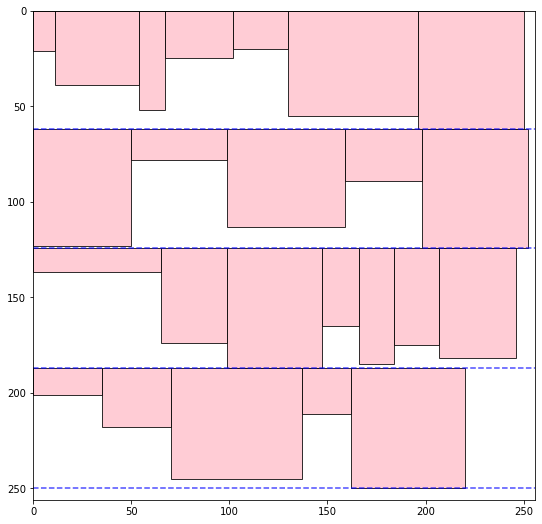

적재율 : 65.44%


In [4]:
Item().putitem_nextfit(testcase1)

## 2. Smaller Height First

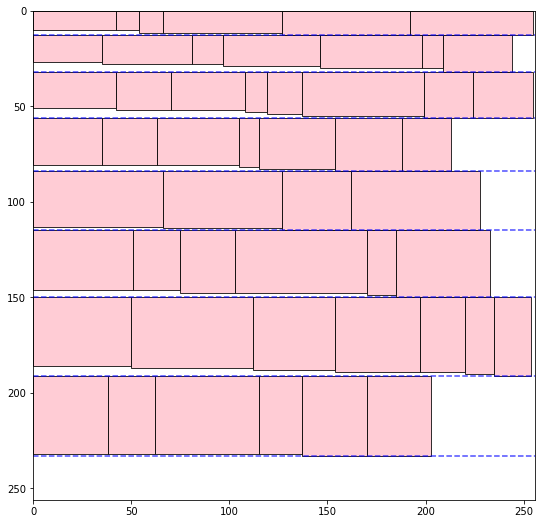

적재율 : 77.33%


In [5]:
Item().putitem_smallerfirst(testcase1)

## 3. Lager Height First

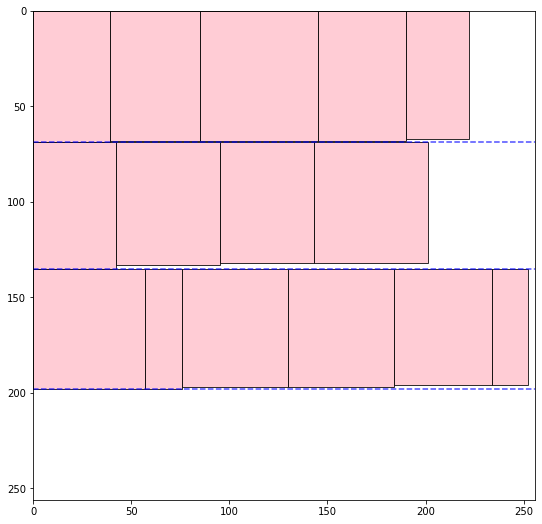

적재율 : 66.49%


In [6]:
Item().putitem_largerfirst(testcase1, simple=True)

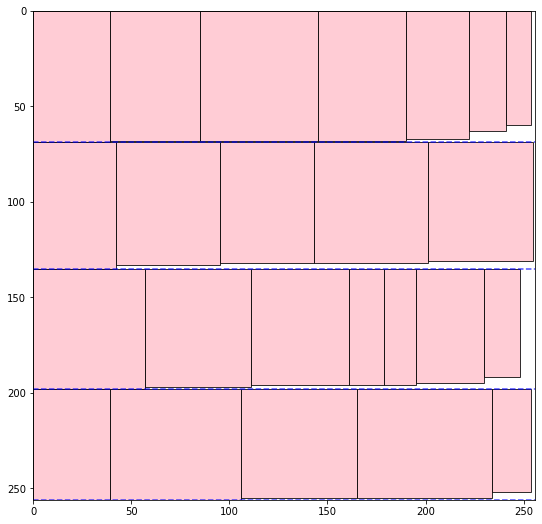

적재율 : 96.1%


In [7]:
Item().putitem_largerfirst(testcase1, simple=False)

## 4. Rotate - 회전하기

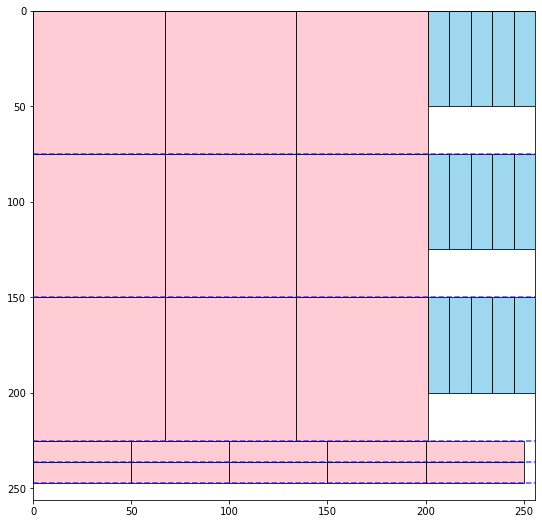

적재율 : 89.99%


In [8]:
Item().putitem_rotate(testcase5)

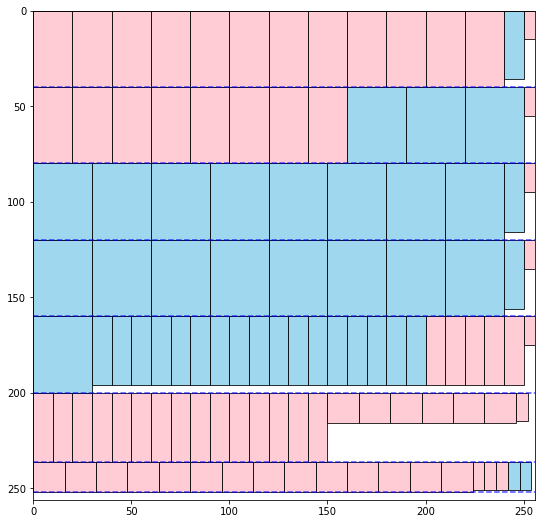

적재율 : 92.33%


In [9]:
Item().putitem_rotate(testcase2)